<a href="https://colab.research.google.com/github/user257814938/Hackathon_1/blob/main/projet/projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1️⃣ Installation & imports

In [1]:
!pip -q install pandas numpy seaborn matplotlib scipy scikit-learn  # installation des librairies principales

import os                                # gestion des fichiers et répertoires
import numpy as np                       # calculs numériques et statistiques
import pandas as pd                      # manipulation de tableaux de données
import matplotlib.pyplot as plt          # visualisation graphique de base
import seaborn as sns                    # visualisations statistiques avancées
from scipy import stats                  # tests statistiques (t-test, chi2...)

pd.set_option("display.max_columns", None)   # affichage complet des colonnes pandas
pd.set_option("display.width", 120)          # largeur d'affichage des DataFrames

sns.set_theme(context="notebook", style="whitegrid")   # style graphique clair
plt.rcParams["figure.dpi"] = 120                        # qualité des figures

2️⃣ Chargement du CSV & vérification

In [2]:
URL = "https://raw.githubusercontent.com/user257814938/Hackathon_1/refs/heads/main/Dataset/raw/IBM%20HR%20Analytics%20Employee%20Attrition%20%26%20Performance.csv"  # lien vers le dataset

df = pd.read_csv(URL, encoding="utf-8", on_bad_lines="skip")    # lecture du fichier CSV depuis GitHub

print("Shape:", df.shape)                    # nombre de lignes et colonnes du dataset
print("\nTypes de données:\n", df.dtypes)     # type de chaque colonne

df.head()                                    # affichage des 5 premières lignes pour vérifier le chargement

expected = ["Attrition"]                    # liste des colonnes attendues
missing = [c for c in expected if c not in df.columns]  # vérifie les colonnes manquantes
print("Colonnes clés manquantes:", missing if missing else "OK - tout présent")

Shape: (1470, 35)

Types de données:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel 

3️⃣ Analyse exploratoire initiale (EDA basique)

Attrition
No     1233
Yes     237
Name: count, dtype: int64
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


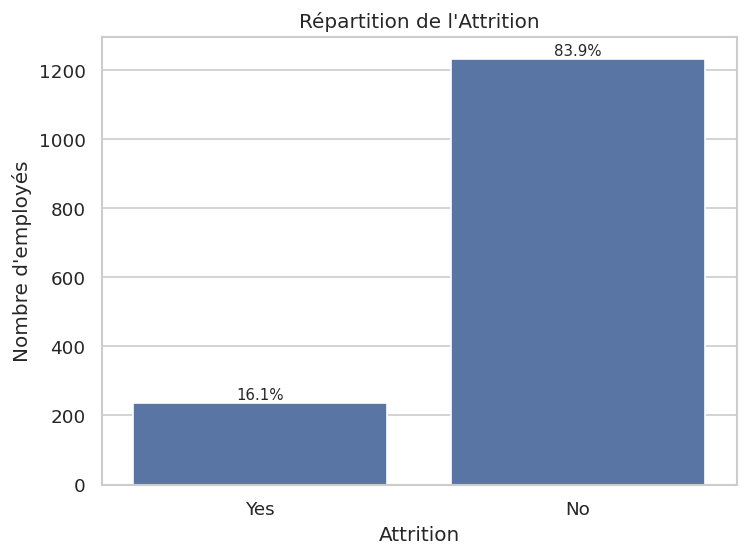

In [3]:
na_counts = df.isna().sum().sort_values(ascending=False)   # nombre de valeurs manquantes par colonne
na_counts.head(15)                                         # affichage des 15 premières

desc_num = df.select_dtypes(include=[np.number]).describe().T   # stats descriptives des variables numériques
desc_num.head(10)                                               # aperçu

desc_cat = df.select_dtypes(exclude=[np.number]).describe().T   # stats descriptives des variables catégorielles
desc_cat.head(10)

if "Attrition" in df.columns:                                  # si la colonne cible existe
    print(df["Attrition"].value_counts())                      # nombre de cas par catégorie
    print(df["Attrition"].value_counts(normalize=True))         # proportions en pourcentage

    figures_dir = "reports/figures"                            # chemin pour sauvegarde des figures
    os.makedirs(figures_dir, exist_ok=True)                     # création du dossier si inexistant

    ax = sns.countplot(x="Attrition", data=df)                 # graphique du taux d’attrition
    ax.set_title("Répartition de l'Attrition")                 # titre du graphique
    ax.set_xlabel("Attrition")                                 # label de l’axe x
    ax.set_ylabel("Nombre d'employés")                         # label de l’axe y

    total = len(df)                                            # nombre total d’observations
    for p in ax.patches:                                       # boucle sur chaque barre du graphique
        height = p.get_height()                                # hauteur de la barre
        pct = 100 * height / total                             # pourcentage correspondant
        ax.annotate(f"{pct:.1f}%",                             # affichage du % au-dessus de la barre
                    (p.get_x() + p.get_width()/2, height),
                    ha="center", va="bottom", fontsize=9)

    plt.tight_layout()                                         # ajustement automatique du graphique
    plt.savefig(os.path.join(figures_dir, "attrition_distribution.png"), bbox_inches="tight")  # sauvegarde de la figure
    plt.show()                                                 # affichage
else:
    print("⚠️ La colonne 'Attrition' n'a pas été trouvée.")

4️⃣ Analyse exploratoire approfondie (EDA avancée)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

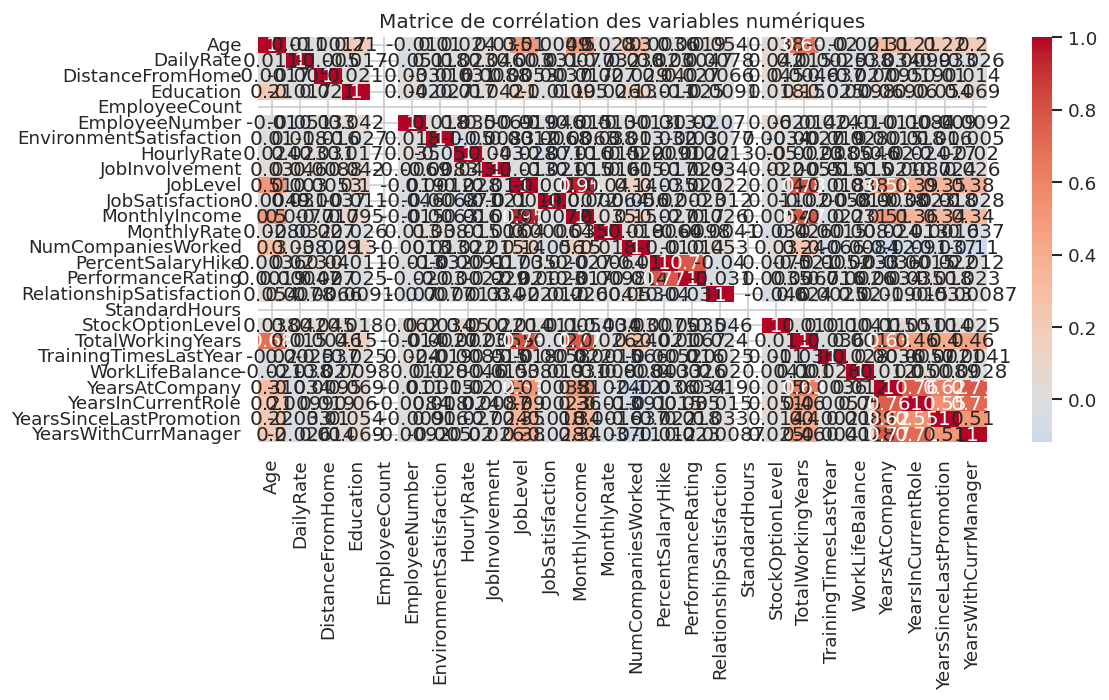

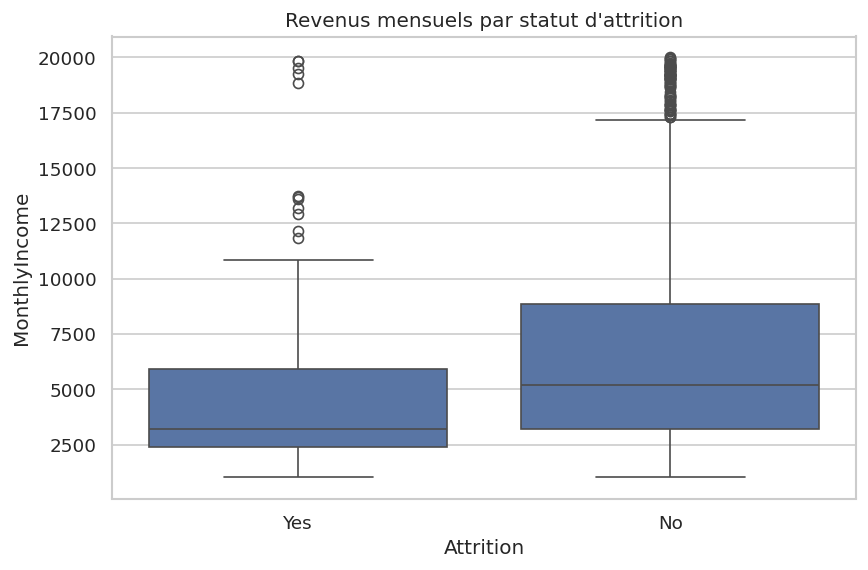

/tmp/ipython-input-2093585961.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Attrition', y='DistanceFromHome', data=df, palette='muted')  # graphique violin


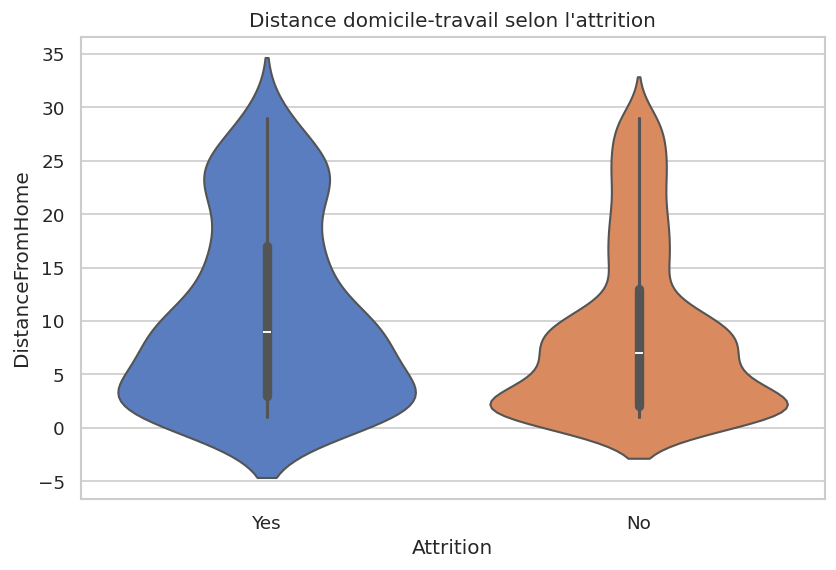

Corrélation Age / Income: 0.50 (p=0.0000)
Attrition                        No       Yes
JobRole                                      
Healthcare Representative  0.931298  0.068702
Human Resources            0.769231  0.230769
Laboratory Technician      0.760618  0.239382
Manager                    0.950980  0.049020
Manufacturing Director     0.931034  0.068966


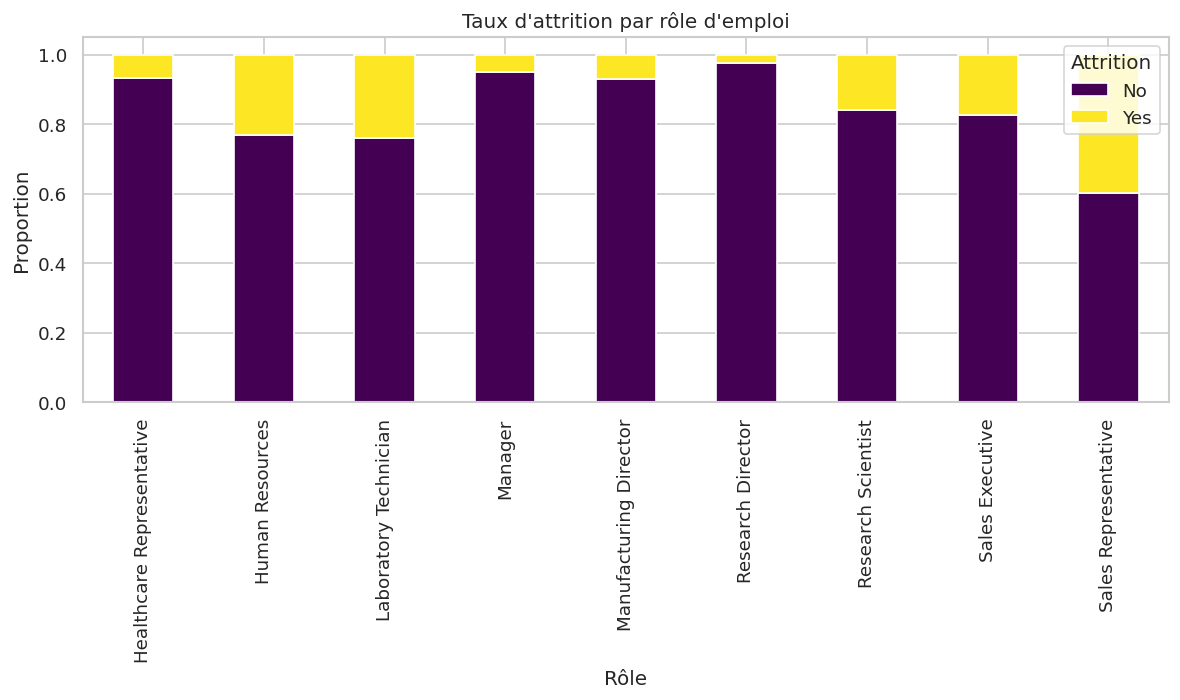

In [4]:
# --- Aperçu complet des types de données et des valeurs non nulles ---
df.info()  # utile pour identifier les colonnes mal typées ou incomplètes

# --- Nombre de valeurs uniques par colonne ---
df.nunique().sort_values(ascending=False)  # permet de détecter des colonnes ID ou constantes

# --- Sélection des colonnes numériques et catégorielles ---
num_cols = df.select_dtypes(include=np.number).columns.tolist()  # liste des colonnes numériques
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()  # liste des colonnes catégorielles

print("\nColonnes numériques:", num_cols)
print("\nColonnes catégorielles:", cat_cols)

# --- Heatmap des corrélations entre variables numériques ---
corr = df[num_cols].corr()                                      # matrice de corrélation
plt.figure(figsize=(10, 6))                                     # taille du graphique
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)         # affichage des corrélations
plt.title('Matrice de corrélation des variables numériques')      # titre du graphique
plt.tight_layout()
plt.savefig('reports/figures/heatmap_corr.png', bbox_inches='tight')  # sauvegarde de la figure
plt.show()

# --- Distribution des revenus mensuels par attrition ---
plt.figure(figsize=(8, 5))                                       # taille du graphique
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)            # boxplot des salaires selon attrition
plt.title('Revenus mensuels par statut d\'attrition')             # titre du graphique
plt.savefig('reports/figures/box_income_attrition.png', bbox_inches='tight')  # sauvegarde
plt.show()

# --- Distribution de la distance domicile-travail par attrition ---
plt.figure(figsize=(8, 5))
sns.violinplot(x='Attrition', y='DistanceFromHome', data=df, palette='muted')  # graphique violin
plt.title('Distance domicile-travail selon l\'attrition')                      # titre
plt.savefig('reports/figures/violin_distance_attrition.png', bbox_inches='tight')  # sauvegarde
plt.show()

# --- Test de corrélation entre l\'âge et le revenu mensuel ---
pearson_corr, p_val = stats.pearsonr(df['Age'], df['MonthlyIncome'])  # corrélation de Pearson
print(f"Corrélation Age / Income: {pearson_corr:.2f} (p={p_val:.4f})")  # affichage du résultat

# --- Croisement entre rôle et attrition (analyse catégorielle) ---
crosstab = pd.crosstab(df['JobRole'], df['Attrition'], normalize='index')  # table de fréquences
print(crosstab.head())  # aperçu du tableau croisé

# --- Visualisation du taux d\'attrition par rôle ---
crosstab.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')  # graphique empilé
plt.title("Taux d'attrition par rôle d\'emploi")
plt.ylabel('Proportion')
plt.xlabel('Rôle')
plt.legend(title='Attrition')
plt.tight_layout()
plt.savefig('reports/figures/attrition_by_role.png', bbox_inches='tight')  # sauvegarde
plt.show()